In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

In [24]:
def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

In [25]:
def aic(v, k, erro):
    SEQ = np.sum(erro ** 2)
    return (len(v) * np.log(SEQ)) + 2*k

In [26]:
data = np.loadtxt('aerogerador.dat')

v = data[:, 0]
pot = data[:, 1]

Best solution: [ 0.18816809 -4.39249372 12.93024325  1.31062626 -2.8683139   3.59817163]
Best fitness: 325138014088.45447


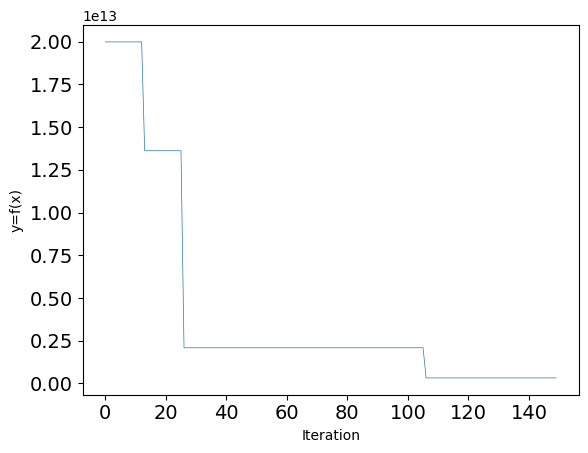

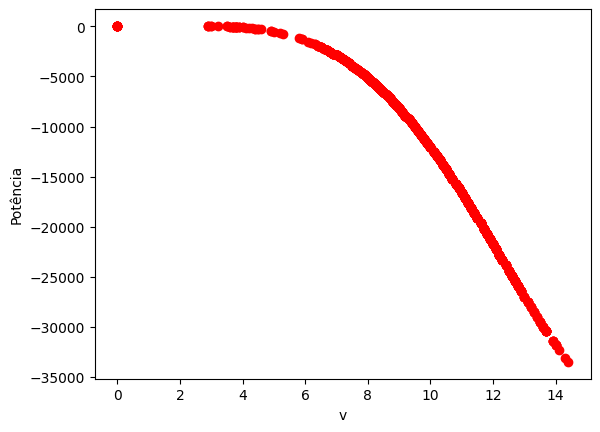

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Ng = 150 # Number of iterations
M = 10
data_values = []

# Define the variables
limites = [-5, 17]
k = 5
y = pot

x_best = np.random.uniform(limites[0], limites[1], size=(k+1,))

#B = np.polyfit(v, y, k)
ypred = np.polyval(x_best, v)
      
erro = y - ypred
SEQ = np.sum(erro ** 2)

Fbest = SEQ

cands = []
aptidao = []

for t in range(1, Ng + 1):
    
    x_cand = np.random.uniform(limites[0], limites[1], size=(k+1,))
    cands.append(x_cand)
    #B = polyfit(v, y, k)
    ypred = np.polyval(x_cand, v)
    erro = y - ypred
    
    SEQ = np.sum(erro ** 2)

    Fcand = SEQ
    
    if Fcand < Fbest:
        x_best = x_cand
        Fbest = Fcand

    aptidao.append(Fbest)
    

ypred = np.polyval(x_best, v)
erro = y - ypred
R2 = r2(y, erro)
R2_ajustado = r2_ajustado(y, erro, len(y), k + 1)
AIC = aic(v, k, erro)
data_values.append((R2, R2_ajustado, AIC))

print("Best solution:", x_best)
print("Best fitness:", Fbest)

plt.figure()
plt.plot(aptidao, linewidth=0.5)
plt.xlabel('Iteration')
plt.ylabel('y=f(x)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('M ={}'.format(m))

ypred = np.polyval(x_best, v)
plt.figure()
plt.plot(v, ypred, 'ro')
plt.xlabel('v')
plt.ylabel('Potência')
#plt.title('M ={}'.format(m))

plt.show()


In [62]:
data_values

[(-12993.939165991214, -13028.700483421417, 59651.910072702674)]

In [63]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
data = pd.DataFrame(data_values, columns=['R2', 'R2_ajustado', 'AIC'], index=range(1))
data

,R2,R2_ajustado,AIC
0,-12993.939166,-13028.700483,59651.910073


In [64]:
# Cria um novo DataFrame com os índices dos maiores e menores valores
new_data = {
    'maior_r2': data['R2'].idxmax(),
    'maior_r2_ajustado': data['R2_ajustado'].idxmax(),
    'menor_aic': data['AIC'].idxmin()
}

result_df = pd.DataFrame(new_data, index=[0])

result_df

,maior_r2,maior_r2_ajustado,menor_aic
0,0,0,0
